Dataset Shape: (20, 2)

Sample Data:
                                           comment     label
0  This video is amazing! Loved every part of it.  positive
1                I really hate the sound quality.  negative
2               The editing was great and smooth.  positive
3                   Not bad, but could be better.   neutral
4                Worst video I’ve seen this week.  negative

 Model Evaluation Metrics:
Accuracy: 0.25
Precision: 0.06
Recall: 0.25
F1 Score: 0.10

Classification Report:
               precision    recall  f1-score   support

    negative       0.25      1.00      0.40         1
     neutral       0.00      0.00      0.00         1
    positive       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4



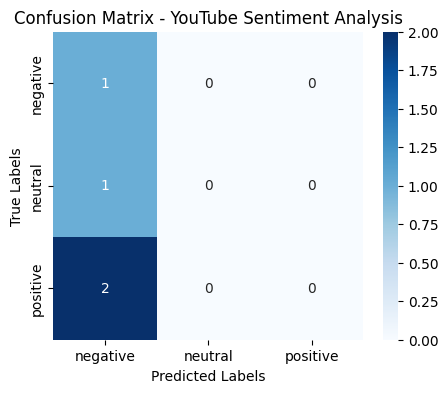


 Sentiment Predictions for New Comments:
Comment: I absolutely loved this video! -> Predicted Sentiment: positive
Comment: The sound was terrible. -> Predicted Sentiment: negative
Comment: It’s okay, not the best but not bad either. -> Predicted Sentiment: negative


In [7]:
#  YouTube Comments Sentiment Analysis using Machine Learning
# -------------------------------------------------------------
# Author: Dilkhush Das
# Goal: Classify YouTube comments into Positive, Negative, or Neutral sentiments.

# 🧩 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Step 2: Load Dataset
data = pd.read_csv("youtube_comments.csv")
print("Dataset Shape:", data.shape)
print("\nSample Data:\n", data.head())

#  Step 3: Basic Text Preprocessing
import re
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

data['clean_comment'] = data['comment'].apply(clean_text)

#  Step 4: Split Dataset
X = data['clean_comment']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Step 5: Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#  Step 6: Train Machine Learning Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

#  Step 7: Evaluate the Model
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

#  Step 8: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - YouTube Sentiment Analysis")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#  Step 9: Test on New Comments
new_comments = [
    "I absolutely loved this video!",
    "The sound was terrible.",
    "It’s okay, not the best but not bad either."
]
new_comments_clean = [clean_text(c) for c in new_comments]
new_features = vectorizer.transform(new_comments_clean)
predictions = model.predict(new_features)

print("\n Sentiment Predictions for New Comments:")
for comment, label in zip(new_comments, predictions):
    print(f"Comment: {comment} -> Predicted Sentiment: {label}")

#  Project Completed

